Use any additional libraries you want, but if you don't explicitly code stuff that I have explicitly asked you to code, you will not get marks.

### Q1. Kernel k-means

Let's try and end our course on a happy note. The smiley dataset you see below is made up of many clusters of points. 

In [1]:
import numpy as np
import numpy.linalg as lin
import numpy.random as rnd
from sklearn.metrics.pairwise import euclidean_distances
from matplotlib import pyplot as plt
from matplotlib.pyplot import cm
from scipy.stats import multivariate_normal

import time
import random


def getFigure( sizex = 7, sizey = 7 ):
    fig = plt.figure( figsize = (sizex, sizey) )
    return fig

def plot2D( X, fig, color = 'r', marker = '+', size = 100, empty = False ):
    plt.figure( fig.number )
    if empty:
        plt.scatter( X[:,0], X[:,1], s = size, facecolors = 'none', edgecolors = color, marker = marker  )
    else:
        plt.scatter( X[:,0], X[:,1], s = size, c = color, marker = marker )


def genCrescentData( d, n, mu, r, flipped = False ):
    X = np.vstack( (np.cos( np.linspace( 0, np.pi, n ) ), np.sin( np.linspace( 0, np.pi, n ) ) ) ).T
    if flipped:
        X[:,1] = -np.abs( X[:,1] )
    else:
        X[:,1] = np.abs( X[:,1] )
    X = (X * r) + mu
    return X

def genSphericalData( d, n, mu, r ):
    X = rnd.normal( 0, 1, (n, d) )
    norms = lin.norm( X, axis = 1 )
    X = X / norms[:, np.newaxis]
    X = (X * r) + mu
    return X

In [2]:
d = 2
n = 200

mu1 = np.array( [0,0] )
mu2 = np.array( [0,1] )
mu3 = np.array( [0,0] )
mu4 = np.array( [-3,5] )
mu5 = np.array( [3,5] )

tmp1 = genCrescentData( d, n, mu1, 1 )
tmp2 = genCrescentData( d, n, mu2, 5, flipped = True )
tmp3 = genSphericalData( d, n, mu3, 10 )
tmp4 = genSphericalData( d, n, mu4, 1 )
tmp5 = genSphericalData( d, n, mu5, 1 )
X = np.vstack( (tmp1, tmp2, tmp3, tmp4, tmp5) )

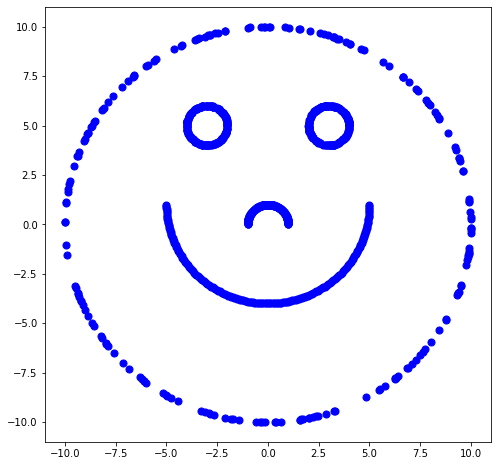

In [3]:
fig = getFigure( 8, 8 )
plot2D( X, fig, size = 50, color = 'b', marker = 'o' )

(a) Can you implement the k-means algorithm to cluster this dataset? Visualize your output. [10 points] 

(b) Implement k-means++ to initialize cluster centers usefully. [5 points]

(c) What value of k gives you the best clustering? Are you happy with the quality of the clustering? [5 points]


In [ ]:
X.shape

### Convergence Criteria: 
If the Frobenius norm(As centroid of  of difference between current centroids and previous centroids is less than a certain threshold(taken to be orders of magnitude small), then we can conclude that the centroid points don't move much and the assigned points to the centroids will most likely be same with significant probability.

$$ \|current\_centroids-previous\_centroids \|_F \leq threshold $$



In [10]:
#Vanilla K means
def K_means(X,K,Centroids,n_iter):
    
    #Initializing output list and cluster dictionary
    Output=[]
    clusters={}
    
    #if centroids don't change much with the previous values we can break
    Prev_centroids=Centroids
    #Iterating for n iterations and 
    for itr in range(n_iter):
        Euc_dist=np.array([]).reshape(rows,0)
         
        #Finding out distance of all the points from each of the centroids    
        for k in range(K):
            tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
            Euc_dist=np.c_[Euc_dist,tempDist]
        
        
        #assign each points to the centroids with min Euclidean distance
        C=np.argmin(Euc_dist,axis=1)+1
    
        flag=0
        #Initialize all k clusters
        for k in range(K):
            clusters[k+1]=np.array([]).reshape(d,0)
        
        #Assign point to closest centroids(Forming a cluster) based on min Euclidean distance
        for i in range(rows):
            clusters[C[i]]=np.c_[clusters[C[i]],X[i]]
        
        
        for k in range(K):
            clusters[k+1]=clusters[k+1].T
        
        #Recompute centroid points by taking average of all the points assigned to a cluster
        for k in range(K):
            Centroids[:,k]=np.mean(clusters[k+1],axis=0)
            if(np.isnan(np.sum(Centroids[:,k]))):
                flag=1
                break
                
        if(flag==1):
            continue
        
        #Norm calculating function
        if lin.norm( Centroids - Prev_centroids, "fro" ) < 1e-20:
            Output=clusters
            print( "Converged within ", itr, "\n")
            break

        
        
    Output=clusters
    
    return (Output,Centroids)

In [11]:

rows=X.shape[0]
n_iter=500
#Vanilla K-means
K=5 #Intial guess on number of clusters

Centroids=np.array([]).reshape(d,0)

#Random Centroid Initialization
for i in range(K):
    
    rand= np.random.randint(0,rows-1)
    Centroids=np.c_[Centroids,X[rand]]
 



Output,Centroids=K_means(X,K,Centroids,n_iter)


Converged within  0 



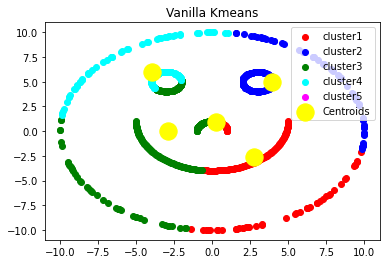

In [12]:
#Plotting clusters along with all the data points
color=['red','blue','green','cyan','magenta']
labels=['cluster1','cluster2','cluster3','cluster4','cluster5']
for k in range(K):
    
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(Centroids[0,:],Centroids[1,:],s=300,c='yellow',label='Centroids')
plt.title('Vanilla Kmeans')
plt.legend()
plt.show()

In [13]:
#Modified KM plus plus initialization function
def initialize(X, k):
    
    #Initializing centroids and selecting first point at random
    centroids=[]
    centroids.append(X[np.random.randint(X.shape[0])])
    
    #Iterating for all k-1 centroids
    for cent in range(k-1):
        
        dist=[]
        #For all the data points in X we find it's distance with cluster k
        for i in range(X.shape[0]):
            pt=X[i,:]
            
            d=10**8
            
            for j in range(len(centroids)):
                temp_dist=np.sum((pt-centroids[j])**2)
                d=min(temp_dist,d)
            dist.append(d)
            
        dist=np.array(dist)
        probs = dist/np.sum(dist)

        probs[probs < 1e-10] = 0
        
        #Selecting centroids uniformly at random based on probabilities, and probabilities directly proportional to distance
        #of each point from the previously assigned centroids
        centroid=X[np.random.choice( np.arange( X.shape[0] ), p = probs ),:]
        centroids.append(centroid)
        dist=[]
      
    #Converting list to arrays
    centroids=np.array(centroids)
    return centroids


In [14]:
#K-means++ initialization

Centroids=initialize(X,K).reshape(d,K)


#Calling K_means function with newly computed centroids
Output,Centroids=K_means(X,K,Centroids,n_iter)

    

Converged within  0 



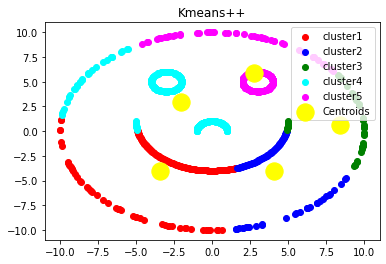

In [15]:
#Plotting clusters and 
color=['red','blue','green','cyan','magenta']
labels=['cluster1','cluster2','cluster3','cluster4','cluster5']
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(Centroids[0,:],Centroids[1,:],s=300,c='yellow',label='Centroids')
plt.title('Kmeans++')
plt.legend()
plt.show()

In [34]:
WCSS=np.array([]) #Within Cluster Sum of Squares

for K in range(1,9):
    
    Centroids=initialize(X,K).reshape(d,K)
  
    Output,Centroids=K_means(X,K,Centroids,n_iter)
    
    wcss=0
    for k in range(K):
        wcss+=np.sum((Output[k+1]-Centroids[:,k])**2)
        
    WCSS=np.append(WCSS,wcss)

Converged within  0 

Converged within  0 

Converged within  0 

Converged within  0 

Converged within  0 

Converged within  0 

Converged within  0 

Converged within  0 



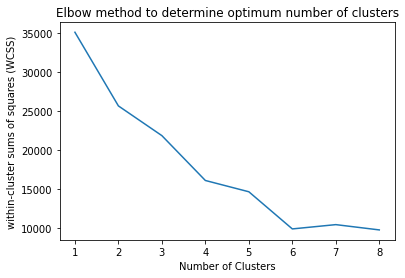

In [35]:
K_array=np.arange(1,9,1)
plt.plot(K_array,WCSS)
plt.xlabel('Number of Clusters')
plt.ylabel('within-cluster sums of squares (WCSS)')
plt.title('Elbow method to determine optimum number of clusters')
plt.show()

### The elbow point mostly lies within 5-6, however on some iterations we might observe a spike/break in wcss error, which probably happens when no point is assigned to a cluster or very few points are assigned to it, more the number of clusters, higher the chances of such occurence.

(d) I'm going to say that we want to be able to do better than this. So I want you to kernelize your k-means algorithm with a Gaussian kernel. Visualize the clustering output of your kernel k-means algorithm [15 points]

### Gaussian/RBF Kernel:
Gaussian Kernel is one of the most widely used workhorse of kernelization as it can perform operation by mapping in an infinite dimensional space, where clusters of data become highly likely, dot product of $ x_i and x_j$ in Kernel/Hilbert space is given by:-

$$ k(x_i, x_j) = exp\Big(\frac{\|x_i - x_j \|^2}{2\sigma^2} \Big) $$

### Hilbertian Distance:

As this term will be often encountered in the following section we'll try have an intuitive explaination of it. It is Distance b/w 2 points in higher dimensional space(Hilbert space).

In [36]:


# For every point, return which is the closest centroid in terms of Hilbertian distance
def getCC( G, alphaVals ):
   
    k = alphaVals.shape[0]
    n = G.shape[0]
    # Find squared Hilbertian norms of the current centroids
    centroidNorms = np.zeros( (k,) )
    for i in range( k ):
        alphaThisCluster = alphaVals[i,:]
        
        centroidNorms[i] = alphaThisCluster.dot( G.dot( alphaThisCluster ) )
    # Find the Hilbertian distance of each point from each centroid
    # Below is the implementation of ||phi(x) - phi(m_u)||^2 = phi(x).T phi(x) + phi(m_u).T phi(m_u) - 2*phi(x).Tphi(m_u)
    D = np.zeros( (k, n) )
    D = D + np.diag( G ) - 2 * np.matmul( alphaVals, G ) + centroidNorms[:, np.newaxis]
    return np.argmin( D, axis = 0 )

# Perform the k-means++ initialization in the higher dimensional feature space
def KMPPIni( G, k ):
    n = X.shape[0]
    idx= np.zeros( (k,), dtype = int )
    # diagonal elements are of form (x_n,x_n) or they're norms in the kernelized space
    norms = np.diag( G )
    # Calculate pairwise squared distance in the kernelized space b/w each pair of points
    D = - 2 * G + norms + norms[:, np.newaxis]
    # Choose a random data point and make it a centroid
    idx[0] = random.randint( 0, n-1 )
    for t in range( 1, k ):
        # For all data points, find the squared Hilbertian distance to the closest centroid
        dist = np.min( D[:, idx[0:t]], axis = 1 )
        # Choose the next centroid to be one that is most likely to be far from all currently chosen centroids
        #[Kmeans++ initialization core]
        probs = dist/np.sum(dist)

        probs[probs < 1e-10] = 0
        idx[t] = np.random.choice( np.arange( n ), p = probs )

    init = np.zeros( (k, n) )
    init[ np.arange(k), idx ] = 1
 

    return init, idx

def getGramMatrix( X, Y, g = 1.0 ):
    # Check if these are 1D datasets
    if len( X.shape ) == 1:
        X = X[:, np.newaxis]
    if len( Y.shape ) == 1:
        Y = Y[:, np.newaxis]
   
  
    return np.exp( - g * euclidean_distances( X, Y ) )


# Update every centroid to the mean of all data points assigned to that cluster
def updateCentroids( G, z, k, prevAlphaVals ):
    alphaVals = np.zeros( (k, G.shape[0]) )
    for i in range( k ):
        if z[z == i].size > 0:
            alphaVals[i, z == i] = 1
            # Normalize the alpha vector
            alphaVals[i,:] = alphaVals[i,:]/np.sum( alphaVals[i,:] )
           
        # If some cluster is empty, return the old value of its centroid
        else:
            print( "Warning: empty cluster detected" )
            alphaVals[i,:] = prevAlphaVals[i,:]
    if lin.norm( alphaVals - prevAlphaVals, "fro" ) < 1e-15:
        converged = True
        print( "Converged within ", end = '')
    else:
        converged = False
    return (alphaVals, converged)

# Execute the Llyod's algorithm 
def kkmeans( G, k, init, niter ):
    alphaVals = init
    
    # getting closest centroid and updating the centroids acc. to the newly formed cluster till convergence
    for t in range( niter ):
        z = getCC( G, alphaVals )
       
        alphaVals, conv = updateCentroids( G, z, k, alphaVals )
        
        #If converged return the cluster points and centroids
        if conv:
            print( t, "iterations" )
            return (alphaVals, z)
    return (alphaVals, z)




In [56]:
k = 5

G = getGramMatrix( X, X, g = 1)

init, idx = KMPPIni( G, k )

(alphaVals, z) = kkmeans( G, k, init, 1000 )


Converged within 37 iterations


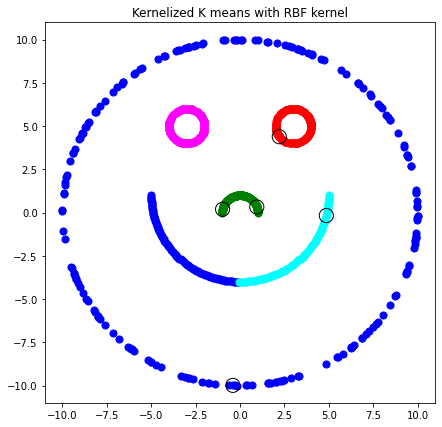

In [57]:

fig = getFigure( 7, 7 )
col=['red','blue','green','cyan','magenta']
for i in range(5):
    plot2D( X[z == i], fig, size = 50, color = col[i], marker = 'o' )


# Highlight the points used to initialize kernel k-means
plot2D( X[idx,:] , fig, size = 200, color = 'k', marker = 'o', empty = True )
plt.title("Kernelized K means with RBF kernel")
plt.show()

### Conclusion:
Kernelized K-means with modified initialization(Kmeans++) far outperforms both Kmeans and Kmeans++ in terms of clustering quality, however on every iteration Kernelized K means may not produce the same type of graph, once in a blue moon  the centroids settle well, and every object(nose, eyes, mouth) is assigned a pure colour, but on other all other iterations the clusters produced are definetly good but not the best.  

### Q2. Expectation-Maximization

We saw how to use EM to learn parameters for Gaussian mixture models last week. Specifically, for a GMM described by the set of parameters $\{\pi_k, \mu_k, \Sigma_k \}_{k=1}^K$, we saw that the E-step boils down to figuring out the expected assignment of clusters based on a responsibility judgment proportional to $\pi_k~N(\mu_k, \Sigma_k)$, given curent parameter estimates, followed by using GDA MLE updates assuming the current expected assignment in the M-step to update parameter values.

(a) Can you derive the E-step and M-step for an EM algorithm that would work for a Gaussian mixture model wherein the mixture weights $\pi_k$ are known, and the covariances are restricted to be spherical, i.e. $\Sigma_k = \sigma^2_k I$? [20 points]

## E and M step derivation for EM algorithm on GMM where mixture weights $ \pi_k $ are known and covariance is spherical

### GMM Derivation:

Probability of observing point "x" is:-
$$  p(x)= \Sigma^K_{k=1}\pi_k N(x| \mu_k, \Sigma_k) $$

Let z be a latent variable associated with the generation of data, then we have:-
$$ z \sim Categorical(\pi) (where\ \pi_k  \geq 0, \Sigma_k \pi_k=1 $$

The joint distribution of x and z will look like:-

$$ p(x,z)=p(z)p(x | z) $$

As mixture weights are known, parameters to be estimated are $ \theta=\{\mu, \sigma_k^2I\} $

Likelihood is :-

$$ L(\theta | X)= p(X| \theta) $$

$$ =\Pi_i p(x_i | \theta)...Assuming\ i.i.d$$ 

$$ =\Pi_i \big(\Sigma^K_{k=1} \pi_k N(x_i | \mu_k, \sigma_k^2I) \big) $$

Taking log on both sides, we get:-

$$ l(\theta|X) = ln L(\theta | X) $$

$$   =\Sigma_i log \big( \Sigma^K_{k=1} \pi_k N(x_i | \mu_k, \sigma_k^2I)  $$

We'll require a bit of Jensen's Inequality, which is:-

$$ log\big(\Sigma^K_{k=1}a_k x_k \big) \geq \Sigma^K_{k=1} a_k log(x_k) $$

where $ a_k $ is weight of point x_k

We'll proceed by defining a lower bound on estimation of log likelihood as follows:-

$$ log(p(x_i | \theta))=log \big(\Sigma^K_{k=1} p(x_i |z_i=k,\theta)p(z_i =k |\theta)\big)$$

 $$      =log \big( \Sigma^{K}_{k=1}p(x_i,z_i=k |\theta) \big) $$

 $$       =log \big( \Sigma^{K}_{k=1} \frac{E[z_{nk}]}{E[z_{nk}]}p(x_i,z_i=k |\theta) \big)$$

 $$       =log \big( \Sigma^{K}_{k=1} E[z_{nk}]\frac{p(x_i,z_i=k|\theta}{E[z_{nk}]} ) \big)  $$

On applying Jensen's Inequality, lowerbound:-

$$ log\big( \Sigma^{K}_{k=1} E[z_{nk}] \frac{p(x_i,z_i=k | \theta)}{E[z_{nk}]} \geq \Sigma^K_{k=1} E[z_{nk}] log \big( \frac{p(x_i, z_i=k | \theta)}{E[z_{nk}]} \big) \big) $$

$$ =l_i(\theta, E[z_n]) $$


### E Step

$$ E[z_{nk}]= p(z_n=k | x_n,\pi, \mu, \sigma^2I) $$

Using Bayes theorem to find the above conditional probability we get:-

$$ E[z_{nk}]=p(z=k|x)=\frac{p(z=k)p(x|z=k)}{p(x)} $$

$$ =p(z=k|x)=\frac{p(z=k)p(x|z=k)}{\Sigma^K_{k=1}p(z=k)p(x|z=k)} $$

$$ =\frac{\pi_k N(x|\mu_k,\sigma_k^2I)}{\Sigma^K_{k=1}\pi_k N(x|\mu_k,\sigma_k^2I)} $$

### M Step

We try to maximize the lower bound of log likelihood so that it inches towards the actual value

$$ L(\theta, E[z_n])= \Sigma_i \Sigma_{k=1}^K E[z_{nk}] log \big(\frac{p(x_i,z_i=k | \theta)}{E[z_{nk}]} \big) $$

$$  = \Sigma_i \Sigma_{k=1}^K E[z_{nk}] log (p(x_i,z_i=k | \theta))- \Sigma_i \Sigma_{k=1}^{K}E[z_{nk}]log(E[z_{nk}]) \big) $$

As evident from the above expression, second term isn't dependent on $\theta$

$$ L(\theta, E[z_n])=\Sigma_{E[nk]}log P(X, Z | \theta)....(1)$$

For maximization of (1), we need to find partial derivatives w.r.t $ \mu,\sigma $, and set it to 0

$$ max_\theta L(\theta, E[z_{nk}])= \nabla_\theta L(\theta, E[z_{nk}])=0 $$

$$ =\big{\{}\frac{d L(\theta, E[z_{nk}])}{d \sigma_k}=0 ; \frac{d L(\theta, E[z_{nk}])}{d mu_k}=0 \big{\}} $$

Let $\Sigma_k=\sigma^2_k I$ and let's compute the optimal mean vector $\bar{\mu_k}$
$$ \frac{dL(\theta, E[z_{nk}]))}{d\mu_{k}} =0$$

$$ \frac{d}{d\mu_k}\big(\Sigma_i \Sigma^K_{k=1} E[z_{nk}] log (\pi_k N(x_i| \mu_k, \Sigma_k)) \big)=0 $$

$$ \frac{d}{d\mu_k}\big(\Sigma_i E[z_{nk}] log(x_k) + \Sigma_i E[z_{nk}] log (N(x_i|\mu_k,\Sigma_k)) \big)=0 $$

$$ \frac{d}{d\mu_k}\big(\Sigma_i E[z_{nk}] log \big(\frac{1}{(2\pi)^{N/2}|\Sigma_k|^{1/2}}exp\big(-\frac{1}{2}(x_i-\mu_k)^T \Sigma^{-1}_k(x_i - \mu_k) \big) \big) \big)=0 $$

$$ \frac{d}{d\mu_k}\big(\Sigma_i E[z_{nk}] log \big(\frac{1}{(2\pi)^{N/2}|\Sigma_k|^{1/2}} + \Sigma_i E[z_{nk}]log\big( exp\big(-\frac{1}{2}(x_i-\mu_k)^T \Sigma^{-1}_k(x_i - \mu_k) \big) \big) \big)=0.....(2) $$

For any symmetric matrix W, any vector x and any scalar s we can write:

$$ \frac{d}{dx}(x-s)^T W (x-s)= -2W(x-s) $$

We'll use the formula above for finding derivative of (2) as follows :-
$$ \Sigma_i E[z_{nk}] \big( -\frac{1}{2}(-2\Sigma_k^{-1}(x_k - \mu_k))\big)=0 $$

$$ \Sigma_i E[z_{nk}] \Sigma_k^{-1}(x_k - \mu_k)=0 $$

$$ \Sigma_i E[z_{nk}]\Sigma^{-1}_k x_i - \Sigma_i E[z_{nk}]\Sigma_k^{-1}\mu_k=0 $$

$$ \mu_k= \frac{\Sigma_i E[z_{nk}]\Sigma^{-1}_k x_i}{\Sigma_i E[z_{nk}]\Sigma^{-1}} $$

$$ \mu_k= \frac{\Sigma_i E[z_{nk}] x_i}{\Sigma_i E[z_{nk}]} $$

For computing the Covariance matrix $ \Sigma_k=\sigma_k^2 I $, we just need to differentiate w.r.t $\sigma_k$

$$ \frac{dL(\theta,E[z_{nk}])}{d\sigma_k}=0 $$

$$ \frac{d}{d\sigma_k}\big(\Sigma_i \Sigma^K_{k=1} E[z_{nk}]log(\pi_k, N(x_i,\mu_k,\sigma_k^2I))\big)=0 $$

$$ \frac{d}{d\sigma_k}\big(\Sigma_i \Sigma^K_{k=1} E[z_{nk}]log(\pi_k  N(x_i,\mu_k,\sigma_k^2I))\big)=0 $$

$$ \frac{d}{d\sigma_k}\big(\Sigma_i E[z_{nk}]log(\pi_k, N(x_i,\mu_k,\sigma_k^2I))\big) =0$$

$$ \frac{d}{d\sigma_k}\big(\Sigma_i E[z_{nk}]\big(log\Big(\frac{1}{(2\pi)^{N/2}|\sigma^2_k I|^{1/2}}exp\big(-\frac{1}{2}(x_i - \mu_k)^T \sigma^{-2}_kI(x_i-\mu_k) \Big)  \big)\big) \big) =0 $$

$$ \frac{d}{d\sigma_k}\Big(\Sigma_i E[z_{nk}]\Big(log\Big(log\Big(\frac{1}{(2\pi)^{N/2}}\Big) +\frac{1}{2}log\Big(\frac{1}{|\sigma^2_kI|}\Big)+ log\Big(exp\Big(-\frac{1}{2}(x_i - \mu_k)^T \sigma^{-2}_kI (x_k -mu_k) \Big) \Big) \Big) \Big) \Big) =0 $$

$$ \frac{d}{d\sigma_k}\Big( \Sigma_i E[z_{nk}] \Big(\frac{1}{2} log \Big(\frac{1}{|\sigma_k^2I|}\Big) -\frac{1}{2}(x_i - \mu_k)^T \sigma^{-2}_kI (x_i -\mu_k) \Big) \Big)=0 $$

Let D=dimension of Covariance matrix
$$ \frac{d}{d\sigma_k}\Big( \Sigma_i E[z_{nk}] \Big(\frac{1}{2} log \Big(\sigma_k^{-2D}\Big) -\frac{1}{2}\sigma^{2}_k\|x_i -\mu_k \|^2_2\Big) \Big)=0 $$

$$ \frac{d}{d\sigma_k}\Big( \Sigma_i E[z_{nk}] \Big(-Dlog(\sigma_k) - \frac{1}{2}\sigma^2_k\|x_i - \mu_k \|^2_3 \Big) \Big)=0 $$

$$ \Sigma_i E[z_{nk}] \Big(-\frac{D}{\sigma_k} + \frac{\|x_i -\mu\|^2}{\sigma_k^3} \Big)=0 $$

$$ D\Sigma_i E[z_{nk}]= \Sigma_i E[z_{nk}] \Big(\frac{\|x_i - \mu_k \|^2_2}{\sigma^2_k} \Big) $$

$$ \bar{\sigma^2_k}=  \frac{\Sigma_i E[z_{nk}]\|x_i-\mu_k \|^2_2}{D\Sigma_i E[z_{nk}]} $$

$$ Optimal\ Cov\ Matrix=\bar{\Sigma_k}=\bar{\sigma^2_k} *I $$


(b) Implement this algorithm and show that it works on synthetic data with 3 clusters. If you are unable to derive the EM algorithm for part (a), implement the EM algorithm I showed in the class slides for the standard GMM (5 point penalty for taking this option) [15 points]. 

In [58]:
#Helper function
def log_sum_exp(Z):
    
    return np.max(Z) + np.log(np.sum(np.exp(Z - np.max(Z))))

#Computes the loglikelihood of the data
def loglikelihood(data, weights, means, covs):
   
    num_clusters = len(means)
    num_dim = len(data[0])
    
    ll = 0
    for d in data:
        
        Z = np.zeros(num_clusters)
        for k in range(num_clusters):
            
            # Compute (x-mu)^T * Sigma^{-1} * (x-mu)
            delta = np.array(d) - means[k]
            exponent_term = np.dot(delta.T, np.dot(np.linalg.inv(covs[k]), delta))
            
            # Compute loglikelihood contribution for this data point and this cluster
            Z[k] += np.log(weights[k])
            Z[k] -= 1/2. * (num_dim * np.log(2*np.pi) + np.log(np.linalg.det(covs[k])) + exponent_term)
            
        # Increment loglikelihood contribution of this data point across all clusters
        ll += log_sum_exp(Z)
        
    return ll

In [59]:
def E_z_Upd(data, weights, means, covariances):
    #Compute
    num_data = len(data)
    num_clusters = len(means)
    resp = np.zeros((num_data, num_clusters))
    
    # Update resp matrix so that resp[i,k] is the responsibility of cluster k for data point i.
    
    for i in range(num_data):
        for k in range(num_clusters):
            #Calculating Expectation
            resp[i, k] = weights[k]*multivariate_normal.pdf(data[i], mean=means[k], cov=covariances[k])
    
    # Add up expectation over each data point and normalize
    row_sums = resp.sum(axis=1)[:, np.newaxis]
    resp = resp / row_sums
    
    return resp

def soft_cnts_upd(resp):
    # Computing the total responsibility assigned to each cluster, which will be useful when 
    # implementing M-steps below. 
    counts = np.sum(resp, axis=0)
    return counts

In [60]:
def means_upd(data, resp, counts):
    num_clusters = len(counts)
    num_data = len(data)
    means = [np.zeros(len(data[0]))] * num_clusters
    
    for k in range(num_clusters):
        # Update means for cluster k using the M-step update rule for the mean variables.
        # This will assign the variable means[k] to be our estimate for mu_hat
        weighted_sum = 0.
        for i in range(num_data):
            
            weighted_sum += data[i] * resp[i][k]
        
        means[k] = weighted_sum / counts[k]

    return means

In [61]:
def spherical_cov_Upd(data, resp, counts, means):
    num_clusters = len(counts)
    num_dim = len(data[0])
    num_data = len(data)
    covariances = [np.zeros((num_dim,num_dim))] * num_clusters
    
    for k in range(num_clusters):
        # Update covariances for cluster k using the M-step update rule for covariance variables.
        # This will assign the variable covariances[k] to be the estimate for Sigma_hat
        weighted_sum = np.zeros((num_dim, num_dim))
        for i in range(num_data):
           
            weighted_sum += resp[i][k]*np.dot(data[i] - means[k], data[i] - means[k])
       
        
        
        covariances[k] = (weighted_sum*np.identity(num_dim)) / counts[k]

    return covariances

In [62]:
def EM_step(data, init_means, init_covariances, init_weights, maxiter=1000, thresh=1e-10):
    
    # Make copies of initial parameters, which we will update during each iteration
    means = init_means[:]
    covariances = init_covariances[:]
    weights = init_weights[:]
    
    # Infer dimensions of dataset and the number of clusters
    num_data = len(data)
    num_dim = len(data[0])
    num_clusters = len(means)
    
    # Initialize some useful variables
    resp = np.zeros((num_data, num_clusters))
    ll = loglikelihood(data, weights, means, covariances)
    ll_trace = [ll]
    
    for it in range(maxiter):
        if it % 5 == 0:
            print("Iteration %s" % it)
        
        # E-step: compute responsibilities/expected value
        resp = E_z_Upd(data, weights, means, covariances)

        # M-step
        # Compute the total responsibility assigned to each cluster, which will be useful when 
        # implementing M-steps below. 
        counts = soft_cnts_upd(resp)
        
       
        

        
        # Update means for cluster k using the M-step update rule for the mean variables.
        # This will assign the variable means[k] to be our estimate for mu_hat
        
        means = means_upd(data, resp, counts)
        
        # Update covariances for cluster k using the M-step update rule for covariance variables.
        # This will assign the variable covariances[k] to be the estimate for sigma_hat
      
        covariances = spherical_cov_Upd(data, resp, counts, means)
        
        # Compute the loglikelihood at this iteration
        
        ll_latest = loglikelihood(data, weights, means, covariances)
        ll_trace.append(ll_latest)
        
        # Check for convergence in log-likelihood by comparing current log-likelihood with the previous value
        if (ll_latest - ll) < thresh and ll_latest > -np.inf:
            
            break
        ll = ll_latest
    
    if it % 5 != 0:
        print("Iteration %s" % it)
    
    out = {'weights': weights, 'means': means, 'covs': covariances, 'loglik': ll_trace, 'resp': resp}

    return out

In [63]:
def generate_MoG_data(num_data, means, covariances, weights):
    #Creates a list of spherical gaussian data points with 3 different clusters
    num_clusters = len(weights)
    data = []
    for i in range(num_data):
        #  Use np.random.choice and weights to pick a cluster id greater than or equal to 0 and less than num_clusters.
        k = np.random.choice(len(weights), 1, p=weights)[0]

        # Use np.random.multivariate_normal to create data from this cluster
        x = np.random.multivariate_normal(means[k], covariances[k])

        data.append(x)
    return data



# Initial Model parameters
init_means = [
    [10, 0], # mean of cluster 1
    [1, 1], # mean of cluster 2
    [0, 10]  # mean of cluster 3
]
init_covariances = [
    [[.5, 0.], [0, .5]], # covariance of cluster 1
    [[.9, 0.], [0, .9]], # covariance of cluster 2
    [[.5, 0.], [0, .5]]  # covariance of cluster 3
]
init_weights = [1/4, 1/2, 1/4]  # weights of each cluster

# Generate data
np.random.seed(4)
data = generate_MoG_data(100, init_means, init_covariances, init_weights)

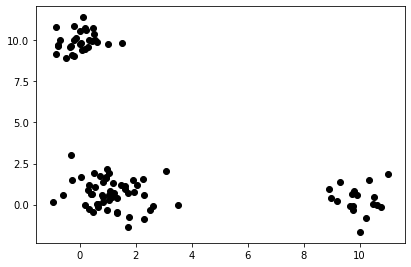

In [64]:
plt.figure()
d = np.vstack(data)
plt.plot(d[:,0], d[:,1],'ko')
plt.rcParams.update({'font.size':16})
plt.tight_layout()

In [65]:
np.random.seed(4)

# Initialization of parameters
chosen = np.random.choice(len(data), 3, replace=False)
initial_means = [data[x] for x in chosen]
initial_covs = [[[1,0],[0,1]]] * 3
initial_weights = [1/3.] * 3

# Run EM 
results = EM_step(data, initial_means, initial_covs, initial_weights)

Iteration 0
Iteration 5
Iteration 9


In [ ]:
results['means']


In [66]:
#Contour plot function using meshgrid 
def plot_contours(data, means, covs, title):
    plt.figure()
    plt.plot([x[0] for x in data], [y[1] for y in data],'ko') # data

    delta = 0.025
    k = len(means)
    x = np.arange(-2.0, 20.0, delta)
    y = np.arange(-2.0, 20.0, delta)
    X, Y = np.meshgrid(x, y)
    col = ['green', 'red', 'indigo']
    for i in range(k):
        mean = means[i]
        cov = covs[i]
        sigmax = np.sqrt(cov[0][0])
        sigmay = np.sqrt(cov[1][1])
        sigmaxy = cov[0][1]/(sigmax*sigmay)
        
        rv = multivariate_normal([mean[0], mean[1]], [[sigmax, sigmaxy], [sigmaxy, sigmay]])
        Z = rv.pdf(np.dstack((X, Y)))
        plt.contour(X, Y, Z, colors = col[i])
        plt.title(title)
    plt.rcParams.update({'font.size':16})
    plt.tight_layout()

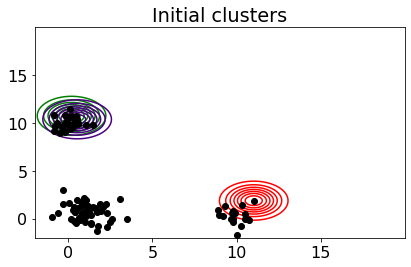

In [67]:
# Parameters after initialization
plot_contours(data, initial_means, initial_covs, 'Initial clusters')

Iteration 0
Iteration 5
Iteration 9


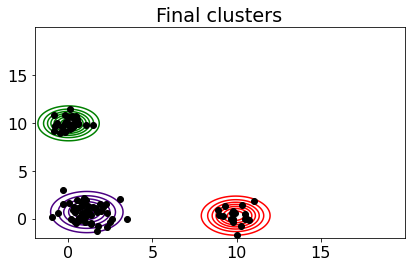

In [69]:
# Parameters after running EM to convergence
results = EM_step(data, initial_means, initial_covs, initial_weights)
plot_contours(data, results['means'], results['covs'], 'Final clusters')

### Conclusion:

As evident from the 2 plots displayed above, we can observe how the Initial clusters starts with a particular initialization which in no way represents the Gaussians from which the data is generated, but the algorithm after converging improves the approximation drastically and the contours/clusters is finally able to approximate the data/the distribution from which it is generated.
